In [3]:
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')
import numpy as np

In [6]:
X = np.genfromtxt('podatki/jester-data.csv', delimiter=',')[:, 1:]
X[np.where(X == 99)] = float("nan") # neznanih vrednosti ne smemo upoštevati

print("velikost: ", X.shape)
print("skupno število ocen:", X.size - np.sum(np.isnan(X)))

velikost:  (23500, 100)
skupno število ocen: 1708993


Text(0, 0.5, 'P(x)')

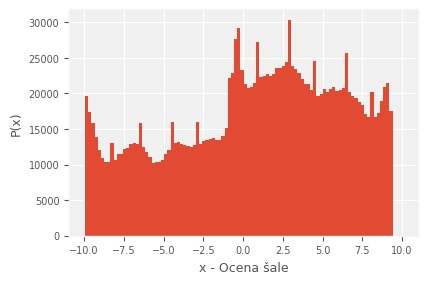

In [8]:
data = X[np.isnan(X) == False]
plt.hist(data, bins=100)
plt.xlabel("x - Ocena šale")
plt.ylabel("P(x)")

In [9]:
(np.isnan(X) == False).sum(axis=0)

array([15507, 16954, 15755, 14901, 23498, 19154, 23497, 23497, 14988,
       18943, 20480, 21019, 23499, 21205, 23499, 23497, 23499, 23497,
       23497, 23498, 23471, 20177, 18706, 15188, 19502, 22383, 23438,
       22551, 23467, 17002, 23204, 23481, 15774, 20372, 23486, 23499,
       15941, 21481, 21870, 21039, 17599, 23202, 16656, 15472, 19974,
       22208, 20875, 23333, 23492, 23499, 17795, 18752, 23498, 23240,
       18589, 23328, 15212, 14913, 17212, 16814, 23401, 23461, 18927,
       16439, 23304, 23458, 16576, 23459, 23446, 19100,  8164,  8288,
        8231,  8392,  8393,  8513,  8551,  8494,  8586,  8643,  8712,
        8799,  8865,  8892,  9054,  9057,  8953,  9148,  9098,  9309,
        9314,  9432,  9530,  9660,  9756,  9890, 10082, 10180, 10310,
        9547])

In [10]:
means     = []
variances = []
for i in range(X.shape[1]):
    s = np.mean(X[:, i][np.isnan(X[:, i]) == False])
    v = np.var(X[:, i][np.isnan(X[:, i]) == False])
    means.append(s)
    variances.append(v)

In [1]:
from scipy.stats import multivariate_normal as mvn 

# Parametri določajo obliko funkcije
mu     = 0   # sredina
sigma2 = 1   # varianca

n = 500  # velikost vzorca
sample = mvn.rvs(mu, sigma2, size=n)  # naključen vzorec n primerov

xr = np.linspace(-5, 5, 100)               # interval X 
P  = [mvn.pdf(x, mu, sigma2) for x in xr]  # porazdelitvena funkcija

# Histogram - porazdelitev naključnih VZORCEV x glede na P(x)
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.title("vzorec")
plt.hist(sample)  # 
plt.xlabel("X")
plt.ylabel("število primerov")

# Graf porazdelitvene funkcije
plt.subplot(1, 2, 2)
plt.title("graf porazdelitve")
plt.plot(xr, P)   # nariši P(x)
plt.ylabel("P(x)")
plt.xlabel("X");

NameError: name 'np' is not defined